<br>
<img style="float:left" src="http://ipython.org/_static/IPy_header.png" />
<br>

# Session 2: Working with a corpus of Malcolm Fraser's speeches

In [2]:
from __future__ import print_function, division

import sys
import nltk
from IPython.display import display, clear_output
sys.path.append("/usr/lib/python2.7/site-packages/")
%matplotlib inline

**Welcome back!**

So, what did we learn yesterday? A brief recap:

* The **IPython** Notebook
* **Python**: syntax, variables, functions, etc.

Today's focus will be on **developing more advanced NLTK skills** and using these skills to **investigate the Fraser Speeches Corpus**. In the final session, we will discuss **how to use what you have learned here in your own research**.

*Any questions or anything before we dive in?*

## Malcolm Fraser and his speeches

So, for much of the next two sessions, we are going to be working with a corpus of speeches made by Malcolm Fraser. 

In [3]:
# this code allows us to display images and webpages in our notebook
from IPython.display import display
from IPython.display import display_pretty, display_html, display_jpeg, display_png, display_svg
from IPython.display import Image
from IPython.display import HTML
import nltk

In [4]:
Image(url='https://www.unimelb.edu.au/malcolmfraser/photographs/family/105~36fam6p9.jpg')

Because our project here is *corpus driven*, we don't necessarily need to know about Malcolm Fraser and his speeches in order to analyse the data: we may be happy to let things emerge from the data themselves. Even so, it's nice to know a bit about him.

Malcolm Fraser was a member of Australian parliament between 1955 and 1983, holding the seat of Wannon in western Victoria. He held a number of ministries, including Education and Science, and Defence. 

He became leader of the Liberal Party in March 1975 and Prime Minister of Australia in December 1975, following the dismissal of the Whitlam government in November 1975.

He retired from parliament following the defeat of the Liberal party at the 1983 election and in 2009 resigned from the Liberal party after becoming increasingly critical of some of its policies. He died on 20 March, 2015.

In [5]:
HTML('<iframe src=https://en.wikipedia.org/wiki/Malcolm_Fraser width=700 height=350></iframe>')

In 2004, Malcolm Fraser made the University of Melbourne the official custodian of his personal papers. The collection consists of a large number of photographs, speeches and personal papers, including Neville Fraser's WWI diaries and materials relating to CARE Australia, which Mr Fraser helped to found in 1987. 

In [6]:
HTML('<iframe src=https://www.unimelb.edu.au/malcolmfraser/ width=700 height=350></iframe>')

Between 1954 until 1983, Malcolm Fraser regularly made a talk to his electorate that was broadcast on Sunday evening on local radio.  

The speeches were transcribed years ago. Optical Character Recognition (OCR) was used to digitise the transcripts. This means that the texts are not of perfect quality. 

Some have been manually corrected, which has removed extraneous characters and mangled words, but even so there are still some quirks in the formatting. 

For much of this session, we are going to manipulate the corpus data, and use the data to restructure the corpus. 

## Cleaning the corpus

A common part of corpus building is corpus cleaning. Reasons for cleaning include:

1. Not break the code with unexpected input
2. Ensure that searches match as many examples as possible
3. Increasing readability, the accuracy of taggers, stemmers, parsers, etc.

The level of kind of cleaning depends on your data and the aims of your project. In the case of very clean data (lucky you!), there may be little that needs to be done. With messy data, you may need to go as far as to correct variant spellings (online conversation, very old books).

### Discussion

*What are the characteristics of clean and messy data? Any personal experiences? Discuss with your neighbours.* 

It will be important to bear these characteristics in mind once you start building your own datasets and corpora. 

## Exploring the corpus

First of all, let's load in our text.

Via file management, open and inspect one file in *corpora/UMA_Fraser_Radio_Talks*. What do you see? Are there any potential problems?

We can also look at file contents within the IPython Notebook itself:

In [7]:
import os

In [8]:
# import tokenizers
from nltk import word_tokenize
from nltk.text import Text

In [9]:
# make a list of files in the directory 'UMA_Fraser_Radio_Talks'
files = os.listdir('corpora/UMA_Fraser_Radio_Talks')
print(files[:3])

['UDS2013680-1-full.txt', 'UDS2013680-10-full.txt', 'UDS2013680-100-full.txt']


Actually, since we'll be referring to this path quite a bit, let's make it into a variable. This makes our code easier to use on other projects (and saves typing)

In [10]:
corpus_path = 'corpora/UMA_Fraser_Radio_Talks'

We can now tell Python to get the contents of a file in the file list and print it:

In [11]:
# print(file contents)# change zero to something else to print(a different file)# "r" tells python that it has the ability to read the files
files = open(os.path.join(corpus_path, files[0]), "r")
text = files.read()
print(text)

<!--start metadata-->
Title: Ministry of Defence, Vietnam
Description: Radio talk
Date: 12/11/1969
Collection: John Malcolm Fraser, 2007.0023
Collection URI: http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details
Format: Uncorrected OCR text
<!--end metadata-->



                        I am looking forward to my new task as Minister for Defence, although
                        it is with regret that I relinquish my post as Minister for Education 
                        and Science.
                        I was associated with my old portfolio at a time when great changes 
                        were taking place in education.
                        These changes were occurring at a time of unprecedented public 
                        interest and concern for education, at a time of increasing student 
                        numbers and rising aspirations.
                        I was glad to have played a part in the task that continu

### Exploring further: splitting up text

We've had a look at one file, but the real strength of NLTK is to be able to explore large bodies of text. 

When we manually inspected the first file, we saw that it contained a metadata section, before the body of the text. 

We can ask Python to show us just the start of the file. For analysing the text, it is useful to split the metadata section off, so that we can interrogate it separately but also so that it won't distort our results when we analyse the text.

In [12]:
# split the file we read in above into two parts
data = text.split("<!--end metadata-->")

In [13]:
# view the first part
print(data[0])

<!--start metadata-->
Title: Ministry of Defence, Vietnam
Description: Radio talk
Date: 12/11/1969
Collection: John Malcolm Fraser, 2007.0023
Collection URI: http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details
Format: Uncorrected OCR text



In [14]:
# split into lines, add '*' to the start of each line
# \r is a carriage return, like on a typewriter.
# \n is a newline character
for line in data[0].split('\r\n'):
    print('*', line)

* <!--start metadata-->
Title: Ministry of Defence, Vietnam
Description: Radio talk
Date: 12/11/1969
Collection: John Malcolm Fraser, 2007.0023
Collection URI: http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details
Format: Uncorrected OCR text



In [15]:
# skip empty lines and any line that starts with '<'
for line in data[0].split('\n'):
    if not line:
        continue
    if line[0] == '<':
        continue
    print('*', line)

* Title: Ministry of Defence, Vietnam
* Description: Radio talk
* Date: 12/11/1969
* Collection: John Malcolm Fraser, 2007.0023
* Collection URI: http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details
* Format: Uncorrected OCR text


In [16]:
# split the metadata items on ':' so that we can interrogate each one
for line in data[0].split('\n'):
    if not line:
        continue
    if line[0] == '<':
        continue
    element = line.split(':')
    print('*', element)

* ['Title', ' Ministry of Defence, Vietnam']
* ['Description', ' Radio talk']
* ['Date', ' 12/11/1969']
* ['Collection', ' John Malcolm Fraser, 2007.0023']
* ['Collection URI', ' http', '//gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details']
* ['Format', ' Uncorrected OCR text']


In [17]:
# actually, only split on the first colon
for line in data[0].split('\n'):
    if not line:
        continue
    if line[0] == '<':
        continue
    element = line.split(':', 1)
    print('*', element)

* ['Title', ' Ministry of Defence, Vietnam']
* ['Description', ' Radio talk']
* ['Date', ' 12/11/1969']
* ['Collection', ' John Malcolm Fraser, 2007.0023']
* ['Collection URI', ' http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details']
* ['Format', ' Uncorrected OCR text']


### **Challenge**: Building a Dictionary

We've already worked with strings and lists. Another kind of data structure in Python is a *dictionary*.

Here is how a simple dictionary works:

In [18]:
# create a dictionary
commonwords = {'the': 4023, 'of': 3809, 'a': 3098}
# search the dictionary for 'of'
commonwords['of']

3809

In [19]:
type(commonwords)

dict

The point of dictionaries is to store a *key* (the word) and a *value* (the count). When you ask for the key, you get its value.

Notice that you use curly braces for dictionaries, but square brackets for lists.

Dictionaries are a great way to work with the metadata in our corpus. Let's build a dictionary called *metadata*:

Your first line will look like this:

      metadata = {}

In [20]:
metadata = {}
for line in data[0].split('\n'):
    if not line:
        continue
    if line[0] == '<':
        continue
    element = line.split(':', 1)
    metadata[element[0]] = element[-1]
print(metadata)

{'Date': ' 12/11/1969', 'Collection': ' John Malcolm Fraser, 2007.0023', 'Format': ' Uncorrected OCR text', 'Collection URI': ' http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details', 'Title': ' Ministry of Defence, Vietnam', 'Description': ' Radio talk'}


In [21]:
# look up the date
print(metadata['Date'])

 12/11/1969


### Building functions

**Challenge**: define a function that creates a dictionary of the metadata for each file and gets rid of the whitespace at the start of each element

**Hint**: to get rid of the whitespace use the *.strip()* command.

In [24]:
# open the first file, read it and then split it into two parts, metadata and body
data = open(os.path.join(corpus_path, 'UDS2013680-100-full.txt'), encoding='latin1')
data = data.read().split("<!--end metadata-->")

In [28]:
def parse_metadata(text):
    metadata = {}
    for line in text.split('\n'):
        if not line:
            continue
        if line[0] == '<':
            continue
        element = line.split(':', 1)
        metadata[element[0]] = element[-1].strip(' ')
    return metadata

Test it out!

In [29]:
parse_metadata(data[0])

{'Collection': 'John Malcolm Fraser, 2007.0023',
 'Collection URI': 'http://gallery.its.unimelb.edu.au/imu/imu.php?request=load&irn=115190&ecatalogue=on&view=details',
 'Date': '2/04/1963',
 'Description': 'press statement',
 'Format': 'Uncorrected OCR text',
 'Title': 'Portland wool sales'}

Now that we're confident that the function works, let's find out a bit about the corpus.
As a start, it would be useful to know which years the texts are from. Are they evenly distributed over time? A graph will tell us!

In [30]:
#import conditional frequency distribution
from nltk.probability import ConditionalFreqDist
import matplotlib
% matplotlib inline

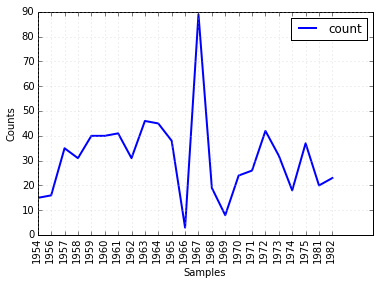

In [31]:
cfdist = ConditionalFreqDist()
for filename in os.listdir(corpus_path):
    text = open(os.path.join(corpus_path, filename), encoding='latin1').read()
    #split text of file on 'end metadata'
    text = text.split("<!--end metadata-->")
    #parse metadata using previously defined function "parse_metadata"
    metadata = parse_metadata(text[0])
    #skip all speeches for which there is no exact date
    if metadata['Date'][0] == 'c':
        continue
    #build a frequency distribution graph by year, that is, take the final bit of the 'Date' string after '/'
    cfdist['count'][metadata['Date'].split('/')[-1]] += 1
cfdist.plot()

Now let's build another graph, but this time by the 'Description' field:

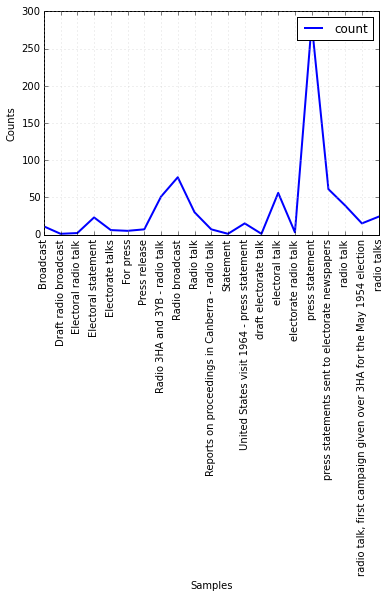

In [33]:
cfdist2 = ConditionalFreqDist()
for filename in os.listdir(corpus_path):
    text = open(os.path.join(corpus_path, filename), encoding='latin1').read()
    text = text.split("<!--end metadata-->")
    metadata = parse_metadata(text[0])
    if metadata['Date'][0] == 'c':
        continue
    cfdist2['count'][metadata['Description']] += 1
cfdist2.plot()

#### Discussion

We've got messy data! What's the lesson here?
<br>

**Bonus challenge**: Build a frequency distribution graph that includes speeches without an exact date.
Hint: you'll need to tell Python to ignore the 'c' and just take the digits

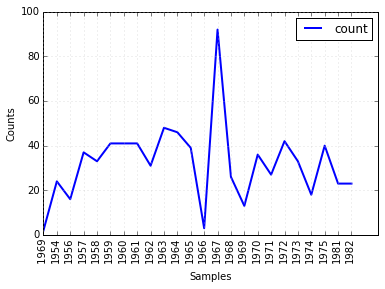

In [35]:
cfdist3 = ConditionalFreqDist()
for filename in os.listdir(corpus_path):
    text = open(os.path.join(corpus_path, filename), encoding='latin1').read()
    text = text.split("<!--end metadata-->")
    metadata = parse_metadata(text[0])
    date = metadata['Date']
    if date[0] == 'c':
        year = date[1:]
    elif date[0] != 'c':
        year = date.split('/')[-1]
    cfdist3['count'][year] += 1
cfdist3.plot()

### Ordering our data

Previously, we looked at features of language in whole books. The way in which you organise your data will affect the ways in which you can interrogate it. Because our data samples span a long stretch of time, we thought we'd investigate the ways in which Malcolm Fraser's language changes over time. This will be the key focus of the next session.

In order to study this, it is helpful to structure our data according to the year of the sample. This simply means creating folders for each sample year, and moving the text of each speech into the correct one.

We can use our metadata parser to help with this task. Then, after structuring our corpus by date, we want the metadata gone, so that when we count language features in the files, we are not also counting the metadata.


#### Side note - Regular expressions
Regular expressions are a powerful means of searching for patterns in data. In this case, we're going to construct a regular expression to find the year of each speech. There are various ways in which we could write this expression, depending on how confident we are that the data is clean and the range of dates we're interested in.

In [39]:
import re
import os
# a path to our soonwordso-be organised corpus
newpath = '../corpora/fraser-year'
if not os.path.exists(os.path.join(newpath)):
    os.makedirs(newpath)
files = os.listdir(corpus_path)
# define a regex to match year portion of date
yearfinder = re.compile('19[0-9]{2}')
for filename in files:
    # split file contents at end of metadata
    text = open(os.path.join(corpus_path, filename), encoding='latin1')
    data = text.read().split("<!--end metadata-->")
    # get date from data[0]
    # use our metadata parser to get metadata
    metadata = parse_metadata(data[0])
    #look up date field of dict entry
    date = metadata.get('Date')
    # search date for year
    yearmatch = re.search(yearfinder, str(date))
    #get the year as a string
    year = str(yearmatch.group())
    # make a directory with the year name
    if not os.path.exists(os.path.join(newpath, year)):
        os.makedirs(os.path.join(newpath, year))
    # make a new file with the same name as the old one in the new dir
    fo = open(os.path.join(newpath, year, filename),"w")
    # write the content portion, without metadata
    fo.write(data[1])
    fo.close()

Did it work? How can we check?

In [40]:
print(os.listdir(newpath))
print(os.listdir(newpath + '/1981'))

['1954', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1981', '1982']
['UDS2013680-703-full.txt', 'UDS2013680-704-full.txt', 'UDS2013680-705-full.txt', 'UDS2013680-706-full.txt', 'UDS2013680-707-full.txt', 'UDS2013680-708-full.txt', 'UDS2013680-709-full.txt', 'UDS2013680-710-full.txt', 'UDS2013680-711-full.txt', 'UDS2013680-712-full.txt', 'UDS2013680-713-full.txt', 'UDS2013680-714-full.txt', 'UDS2013680-715-full.txt', 'UDS2013680-716-full.txt', 'UDS2013680-717-full.txt', 'UDS2013680-718-full.txt', 'UDS2013680-719-full.txt', 'UDS2013680-720-full.txt', 'UDS2013680-721-full.txt', 'UDS2013680-722-full.txt', 'UDS2013680-723-full.txt', 'UDS2013680-724-full.txt', 'UDS2013680-725-full.txt']


## Using NLTK to analyse the Fraser Corpus

The books were were working with yesterday had already had some processing done on them so that we could use NLTK to find features of the language. Remember that Python regards a text file as a single long string of characters. The first thing to do is to start breaking the text up into sentences and words.

In [41]:
from nltk import word_tokenize
speech = open('../corpora/fraser-year/1975/UDS2013680-678-full.txt', "r").read() 
tokens = word_tokenize(speech)
print(tokens[:100])

['ELECTORAL', 'RADIO', 'TALK', 'Embargo', ':', 'Sunday', ',', '23rd', 'Feb.', '75', '.', '6.00', 'p.m', '.', 'THE', 'HON', '.', 'MEMBER', 'FOR', 'WANNON', '-', 'MALCOLM', 'FRASER', 'In', 'answer', 'to', 'questions', 'early', 'this', 'week', ',', 'the', 'Treasurer', ',', 'Dr', 'Cairns', ',', 'put', 'himself', 'in', 'direct', 'contradiction', 'to', 'the', 'Prime', 'Minister', 'concerning', 'the', 'nature', 'of', 'economic', 'problems', '.', 'On', 'the', '27th', 'January', ',', 'Mr', 'Whitlam', 'was', 're-', 'ported', 'to', 'have', 'said', 'from', 'Adelaide', ':', "''", 'You', 'can', 'not', 'blame', 'Vietnam', 'for', 'the', 'inflation', 'in', 'the', 'Western', 'world', '.', '``', 'You', 'can', 'not', 'blame', 'the', 'Oil', 'crisis', 'for', 'the', 'inflation', 'in', 'Australia', '.', 'You', 'can', 'not']


Breaking a speech into tokens lets us do the sort of word counting that we were doing yesterday on the speeches. We can do some more interesting linguistic analysis if we use Part of Speech tagging. NLTK has a number of different Part of Speech tags that we could use, but the simplest one is called 'Universal', and we'll use that here.

In [42]:
sentence = "They refuse to permit us the refuse permit"
words = word_tokenize(sentence)
tagged = nltk.pos_tag(words, tagset='universal')
print(tagged)

[('They', 'PRON'), ('refuse', 'VERB'), ('to', 'PRT'), ('permit', 'VERB'), ('us', 'PRON'), ('the', 'DET'), ('refuse', 'NOUN'), ('permit', 'NOUN')]


Part of Speech tagging creates bigrams, that is, it associates the word with its tag in a pair of items that we can see above in brackets.  

In [43]:
tag_fd = nltk.FreqDist(tag for (word, tag) in tagged)
tag_fd.most_common()

[('PRON', 2), ('VERB', 2), ('NOUN', 2), ('DET', 1), ('PRT', 1)]

### Challenge!
Use Part of Speech tagging to tag the speech that we have just tokenised the do the following:
* Find the most common parts of speech
* Find the most common verbs and create a frequency Distribution graph of your result
* Find the 10 most common nouns in the speech

*Hint: to find the most common verbs and nouns, you will need to create a list that contains only the verbs or only the nouns from the speech. Use a for loop to create your list. Then create a frequency distribution*

In [44]:
tagged_speech = nltk.pos_tag(tokens, tagset = 'universal')
speech_fd = nltk.FreqDist(tag for (word, tag) in tagged_speech)
speech_fd.most_common()

[('NOUN', 291),
 ('VERB', 156),
 ('ADP', 128),
 ('DET', 127),
 ('.', 84),
 ('ADV', 50),
 ('ADJ', 49),
 ('PRON', 39),
 ('PRT', 32),
 ('CONJ', 26),
 ('NUM', 22),
 ('X', 6)]

156
[('is', 15), ('are', 10), ('have', 8), ('be', 6), ('made', 5), ('blame', 4), ('can', 4), ('does', 3), ('put', 3), ('said', 3)]


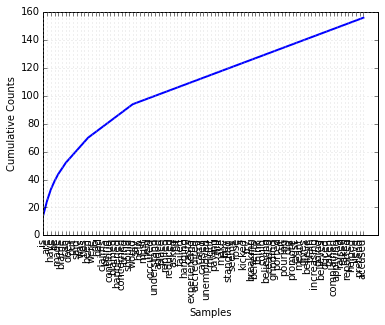

In [48]:
verblist = []
for (word, tag) in tagged_speech:
    if tag == 'VERB':
        verblist.append(word)
# Check the length of the list of verbs. 
#If it matches the number of verbs above, you can be fairly sure your loop has worked as expected
print(len(verblist))
verb_fd = nltk.FreqDist(verblist)
print(verb_fd.most_common()[:10])
verb_fd.plot(cumulative = True)

In [49]:
nounlist = []
for (word, tag) in tagged_speech:
    if tag == 'NOUN':
        nounlist.append(word)
#print(nounlist[:10])print(len(nounlist))noun_fd = nltk.FreqDist(nounlist)
print(noun_fd.most_common()[:10])

NameError: name 'noun_fd' is not defined

**Extension**
There are a few things to note about this result - Prime and Minister have been returned as two different, equally frequent nouns. Because we're humans, not computers, we know it's likely that what we're actually seeing is 'Prime Minister'. It's also unlikely that 'North' 'South' occur alone - perhaps Mr Fraser was talking baout North and South Vietnam? We could test for bigrams (words that typically occur side by side) to see if this is the case. In order to perform this test, we must first convert our list of tokens into and NLTK text. We can then use specific NLTK functions on the text.

In [ ]:
print(type(tokens))speech_text = nltk.Text(tokens)
print(type(speech_text))speech_text.collocations()

### Some linguistics...

*Functional linguistics* is a research area concerned with how *realised language* (lexis and grammar) work to achieve meaningful social functions.

One functional linguistic theory is *Systemic Functional Linguistics*, developed by Michael Halliday (Prof. Emeritus at University of Sydney).

Central to the theory is a division between **experiential meanings** and **interpersonal meanings**.

* Experiential meanings communicate what happened to whom, under what circumstances.
* Interpersonal meanings negotiate identities and role relationships between speakers 

Halliday argues that these two kinds of meaning are realised **simultaneously** through different parts of English grammar.

* Experiential meanings are made through **transitivity choices**.
* Interpersonal meanings are made through **mood choices**


Transitivity choices include fitting together configurations of:

* Participants (*a man, green bikes*)
* Processes (*sleep, has always been, is considering*)
* Circumstances (*on the weekend*, *in Australia*)

Mood features of a language include:

* Mood types (*declarative, interrogative, imperative*)
* Modality (*would, can, might*)
* Lexical density--wordshe number of words per clause, the number of content to non-content words, etc.

Lexical density is usually a good indicator of the general tone of texts. The language of academia, for example, often has a huge number of nouns to verbs. We can approximate an academic tone simply by making nominally dense clauses: 

      The consideration of interest is the potential for a participant of a certain demographic to be in Group A or Group B*.

Notice how not only are there many nouns (*consideration*, *interest*, *potential*, etc.), but that the verbs are very simple (*is*, *to be*).

In comparison, informal speech is characterised by smaller clauses, and thus more verbs.

      A: Did you feel like dropping by?
      B: I thought I did, but now I don't think I want to

Here, we have only a few, simple nouns (*you*, *I*), with more expressive verbs (*feel*, *dropping by*, *think*, *want*)

> **Note**: SFL argues that through *grammatical metaphor*, one linguistic feature can stand in for another. *Would you please shut the door?* is an interrogative, but it functions as a command. *invitation* is a nominalisation of a process, *invite*. We don't have time to deal with these kinds of realisations, unfortunately.

In the context of Fraser's speech, there are nearly twice as many nouns as verbs, and the verbs are generally quite simple ones (parts of To Be and To Have make up about a quarter). This suggests that Fraser's speech, even when giving a radio talk to his electorate, is more towards the formal end of the spectrum. 

## Recap
So far today we have:
* Imported text into NLTK
* Used functions and loops to investigate metadata and organise our corpus
* Tokenised raw text into words
* Tagged words as parts of speech
* Converted a list into NLTK Text for further analysis

## Stopwords
Yesterday, when we did our frequency counts of the books in the NLTK Library, we noticed that a lot of speace was taken up by little words like 'and' and 'of' and 'the' which don't add a lot to our understanding of text. These are called 'stop words'. It will help our analysis if we exclude them.

In [ ]:
fdist1 = nltk.FreqDist(tokens)
fdist1.most_common()[:20]

In [ ]:
print(len(speech_text))
print(len(set(speech_text)))

In [ ]:
#First let's get rid of the puncutation
speech = [word for word in speech_text if word.isalpha()]
print(len(speech))#Then get rid of capitals
vocab = [word.lower() for word in speech]
print(len(set(vocab)))

In [ ]:
from nltk.corpus import stopwords
#Create a variable that contains all the stopwords in the NLTK corpus
ignored_words = nltk.corpus.stopwords.words('english')
unstopped = [word for word in vocab if word not in stopwords.words('english')]
fdist2 = nltk.FreqDist(unstopped)
fdist2.most_common()[:20]

The list we have now is probably more intersting if we wanted to get a sense of the key issues that Fraser was talking about in this speech. Note, we're working with a very small sample here, only 800 words long. This sort of analysis is much more useful over really big corpora.

*Note: We could have condensed the first two steps into a single line of code that looked like this:*

        unstopped = [word for word in speech if word.lower() not in stopwords.words('english') and word.isalpha()]

## Collocation
We've just used collocation to test a hypothesis about the most common nouns in the speech we were investigating. Collocation can be quite a powerful tool for finding features of language.

First, let's look for bigrams in the whole list of tokens:

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)
sorted(finder.nbest(bigram_measures.raw_freq, 10))

That doesn't tell us much. Let's try again with 'unstopped' our list of tokens with the punctuation and stopwords removed

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(unstopped)
sorted(finder.nbest(bigram_measures.raw_freq, 10))

As well as identifying collocations (words that appear near each other), we can also look for n-grams or clusters, which appear immediately adjacent to each other. Repeated N-grams are a good way to get a sense of what a text is about. First, let's see how n-grams are created:

In [ ]:
print(sent2)

In [ ]:
from nltk.util import ngrams
n = 3
trigrams = ngrams(sent2, 3)
for gram in trigrams:
    print(gram)

There are a lot of trigrams in the sentence, and they don't tell us much. It's when n-grams are repeated that they start to get interesting.

In [ ]:
from collections import defaultdict
#this will let us find duplicates in our list of n-grams

In [ ]:
#Define a function that will find duplicate lists within a list (i.e. duplicate n-grams within a text)
def list_duplicates(seq):
    tally = defaultdict(list)
    for i, item in enumerate(seq):
        tally[item].append(i)
    return ((len(locs), key) for key, locs in tally.items() if len(locs) > threshold)

In [ ]:
#Define a function that will find n-grams that occur atleast 4 times
def ngrammer(text, gramsize, threshold = 4):
    def list_duplicates(seq):
        tally = defaultdict(list)
        for i, item in enumerate(seq):
            tally[item].append(i)
        return ((len(locs), key) for key, locs in tally.items() if len(locs) > threshold)
    raw_grams = ngrams(text, gramsize)
    dupes = list_duplicates(raw_grams)
    return sorted(dupes, reverse = True)

In [ ]:
sense = [word for word in text2 if word.isalpha()]
ngrammer(sense, 3, threshold = 20)

In [ ]:
ngrammer(tokens, 3, threshold = 2)

###Another way to get those ngrams

* No functions here, for simplicity


In [ ]:
import operator
from collections import Counter
threshold = 2
ng = 3
testtext = tokens

#Create out ngram, convert to a list, 
#run a counter to count the number of entries for each unique list element
raw_grams = ngrams(testtext, ng)
listgrams = list(raw_grams)
counts = Counter(listgrams)
print(len(listgrams), len(counts)))
#Create a regular dictionary, this is mostly done so we can ignore Counter values less than threshold
D = {}
for k,v in counts.items():
    if v > threshold:
        D[k] = v
#Here is a way to sort a dictionary, based on the value (key=operator.itemgetter(1))
sorted_x = sorted(D.items(), key=operator.itemgetter(1), reverse=True)